Imported Decision Tree: 0.029781723697589857
Our Decision Tree: 0.029781723697589857


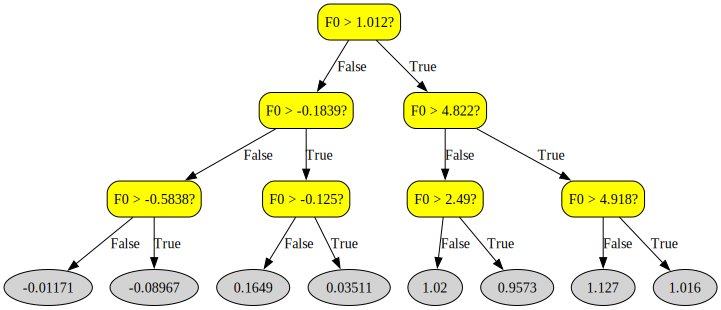

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.tree import DecisionTreeRegressor
from TreeRegressor import TreeRegressor
from IPython.display import display

depth = 3

impModel = DecisionTreeRegressor(random_state=0, max_depth=depth)
ourModel = TreeRegressor(max_depth=depth)
models = {
    'Imported Decision Tree': impModel,
    'Our Decision Tree': ourModel
    }

def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

X, Y = make_some_data(100)

for name, model in models.items():
    cv_results = cross_validate(model, X, Y, scoring='neg_mean_squared_error')
    mean_mse = -np.mean(cv_results['test_score'])
    print(f"{name}: {mean_mse}")
    
ourModel.fit(X, Y)
display(ourModel.draw_tree())

